# 1. Đọc dữ liệu (1 điểm)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

In [11]:
# Đọc dữ liệu
df = pd.read_csv("black_friday.csv")

# Hiển thị 5 dòng đầu tiên
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# 2. Thông tin dữ liệu (1 điểm)

In [19]:
# Kiểm tra số dòng và số cột
print("(Số dòng, số cột): ", df.shape)

# Kiểm tra số lượng giá trị bị thiếu trong từng cột
df.isna().sum()


(Số dòng, số cột):  (550068, 12)


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Nhận xét:
-
-
-

# 3. Phân loại thuộc tính (1 điểm)


In [20]:
# Code
Categorical = df.select_dtypes(include=["object"]).columns.tolist()  # Thuộc tính định tính
Numerical = df.select_dtypes(include=["int64", "float64"]).columns.tolist()  # Thuộc tính định lượng

Categorical, Numerical


(['Product_ID',
  'Gender',
  'Age',
  'City_Category',
  'Stay_In_Current_City_Years'],
 ['User_ID',
  'Occupation',
  'Marital_Status',
  'Product_Category_1',
  'Product_Category_2',
  'Product_Category_3',
  'Purchase'])

- Các thuộc tính định tính (Categorical):



- Các thuộc tính định lượng (Numerical):




# 4. Sản phẩm phổ biến (1 điểm)

In [30]:
# Số lượng loại sản phẩm khác nhau
print("Số loại sản phẩm:", df["Product_ID"].nunique())

# Sản phẩm được mua nhiều nhất
print("Sản phẩm được mua nhiều nhất:", df["Product_ID"].value_counts().idxmax())
print("Số lần mua:", df["Product_ID"].value_counts().max())

#############################################
#bổ sung
# Tìm sản phẩm được mua ít nhất
least_frequent_product = df["Product_ID"].value_counts().idxmin()  # ID của sản phẩm ít được mua nhất
least_frequent_count = df["Product_ID"].value_counts().min()  # Số lần sản phẩm đó được mua

print(f"Sản phẩm được mua ít nhất là {least_frequent_product} với {least_frequent_count} lần mua.")


Số loại sản phẩm: 3631
Sản phẩm được mua nhiều nhất: P00265242
Số lần mua: 1880
Sản phẩm được mua ít nhất là P00299342 với 1 lần mua.


Nhận xét:

-
-


# 5. Tỷ lệ nam và nữ (1 điểm)

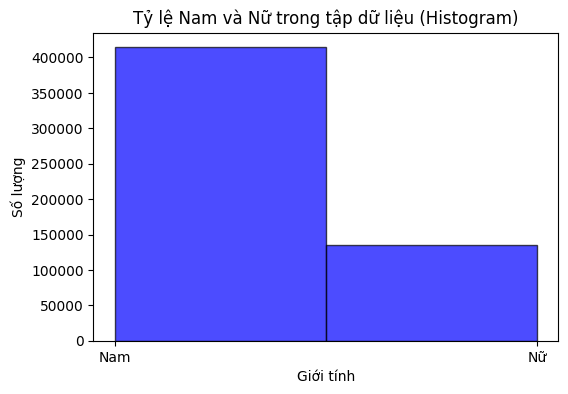

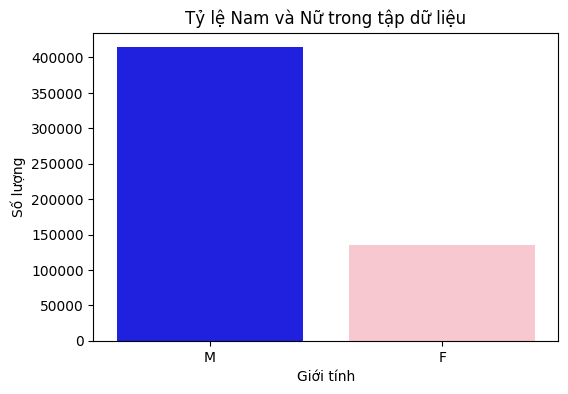

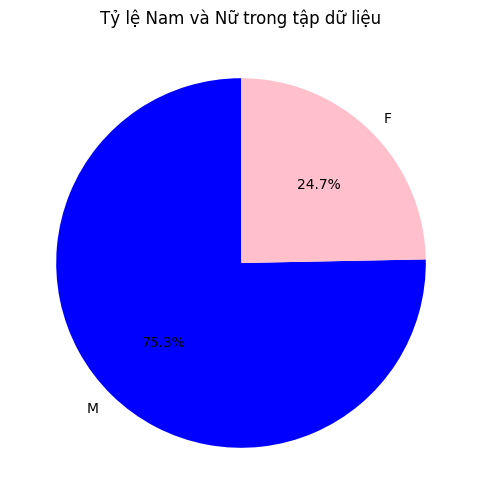

In [37]:
# Đếm số lượng nam và nữ
df["Gender"].value_counts()

# Trực quan hóa (biểu đồ histogram)

# Chuyển đổi giới tính thành số (Nam = 0, Nữ = 1)
df["Gender_Num"] = df["Gender"].map({"M": 0, "F": 1})

# Vẽ histogram
plt.figure(figsize=(6, 4))
plt.hist(df["Gender_Num"], bins=2, color="blue", edgecolor="black", alpha=0.7)

# Định dạng trục x thành Nam/Nữ
plt.xticks([0, 1], ["Nam", "Nữ"])
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")
plt.title("Tỷ lệ Nam và Nữ trong tập dữ liệu (Histogram)")
plt.show()

#################################
# Dùng biểu đồ cột (bar plot) hoặc biểu đồ tròn (pie chart)
# Đếm số lượng nam và nữ
gender_counts = df["Gender"].value_counts()

# Vẽ biểu đồ cột 
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette=["blue", "pink"], legend=False)
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")
plt.title("Tỷ lệ Nam và Nữ trong tập dữ liệu")
plt.show()


# Vẽ biểu đồ tròn (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["blue", "pink"], startangle=90)
plt.title("Tỷ lệ Nam và Nữ trong tập dữ liệu")
plt.show()



# 6. Nhóm tuổi có mức chi tiêu trung bình cao nhất (1 điểm)

In [51]:
# Tính mức chi tiêu trung bình theo nhóm tuổi
age_avg_purchase = df.groupby("Age")["Purchase"].mean().sort_values(ascending=False)

# Hiển thị kết quả
print(age_avg_purchase)

# Hiển thị nhóm tuổi có mức chi tiêu cao nhất
age_avg_purchase.idxmax()
age_avg_purchase.max()

Age
51-55    9534.808031
55+      9336.280459
36-45    9331.350695
26-35    9252.690633
46-50    9208.625697
18-25    9169.663606
0-17     8933.464640
Name: Purchase, dtype: float64


np.float64(9534.808030960236)

# 7. Thống kê mức chi tiêu

In [38]:
# Tính các đại lượng thống kê
mean_purchase = df["Purchase"].mean()  # Giá trị trung bình
median_purchase = df["Purchase"].median()  # Trung vị
std_purchase = df["Purchase"].std()  # Độ lệch chuẩn

print(f"Trung bình mức chi tiêu: {mean_purchase}")
print(f"Trung vị mức chi tiêu: {median_purchase}")
print(f"Độ lệch chuẩn mức chi tiêu: {std_purchase}")

Trung bình mức chi tiêu: 9263.968712959126
Trung vị mức chi tiêu: 8047.0
Độ lệch chuẩn mức chi tiêu: 5023.065393820582


Nhận xét:
-
-

# 8. Trực quan hóa phân bố chi tiêu

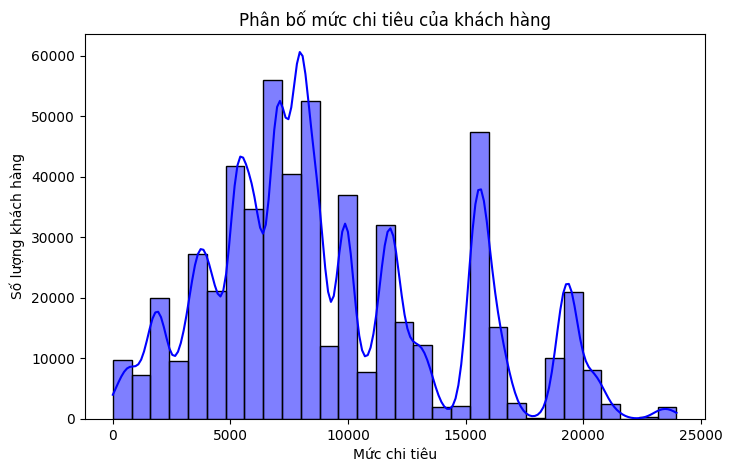

In [44]:
# Vẽ đồ thị Histogram hoặc Line hoặc hỗn hợp.

# Vẽ biểu đồ histogram.
plt.figure(figsize=(8, 5))
sns.histplot(df["Purchase"], bins=30, kde=True, color="blue")
plt.xlabel("Mức chi tiêu")
plt.ylabel("Số lượng khách hàng")
plt.title("Phân bố mức chi tiêu của khách hàng")
plt.show()

Nhận xét:
-
-

# 9. Biểu đồ hộp so sánh mức chi tiêu theo nhóm tuổi và giới tính (1 điểm)






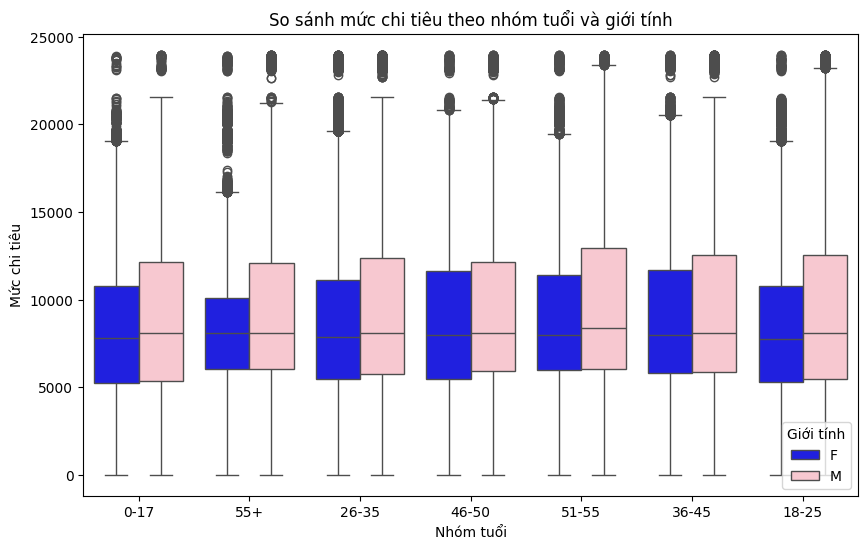

In [45]:
# Biểu đồ hộp (box-plot)

# Vẽ biểu đồ hộp so sánh mức chi tiêu theo nhóm tuổi và giới tính

plt.figure(figsize=(10, 6))
sns.boxplot(x="Age", y="Purchase", hue="Gender", data=df, palette=["blue", "pink"])
plt.xlabel("Nhóm tuổi")
plt.ylabel("Mức chi tiêu")
plt.title("So sánh mức chi tiêu theo nhóm tuổi và giới tính")
plt.legend(title="Giới tính")
plt.show()


Nhận xét:
-
-

# 10. Biểu đồ tròn thể hiện tỷ lệ tổng chi tiêu của từng nhóm tuổi

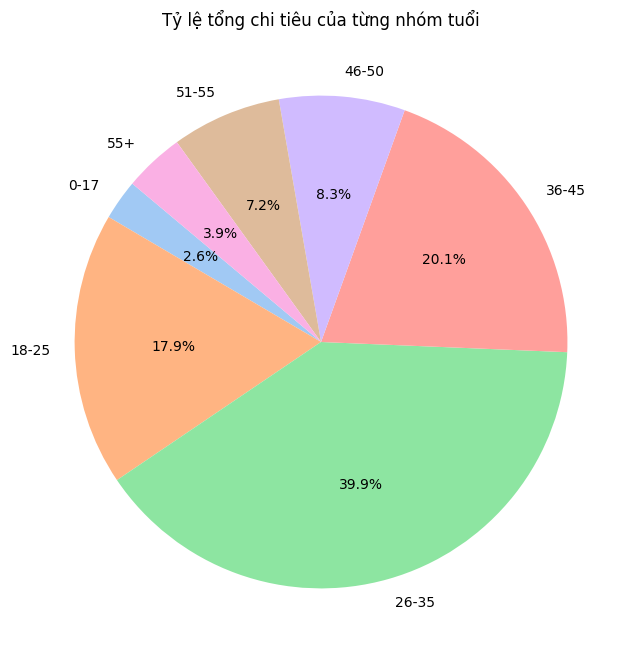

In [46]:
# Biểu đồ tròn

# Tính tổng chi tiêu theo nhóm tuổi
age_purchase = df.groupby("Age")["Purchase"].sum()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(age_purchase, labels=age_purchase.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Tỷ lệ tổng chi tiêu của từng nhóm tuổi")
plt.show()
